# IBM Coursera Capstone Project

## Introduction/Business Problem

**If you are a first-time visitor to London, it can seem like an overwhelming place because there are so many popular places to visit, such as the iconic clock tower called ‘Big Ben’, London Eye, Westminster Abbey, Buckingham Palace, Windsor Castle, museums, and the list goes on.** <br><br>

**Although 11.3 million visitors are expected in 2021, which is nowhere near the 21 million visitors in 2019, it is still a very large number for a city with a population of approximately 9 million. Besides so many tourist attractions, what kinds of restaurants are available in London? Using various libraries and Foursquare API, we will find the answer to this question.**

## Data Description

**For this project, geographical data, such as names of boroughs (neighborhoods), coordinates (latitude and longitude) will be needed to display these locations on maps.** <br>

**Wikipedia is a good source to retrieve London’s list of boroughs and geopy library will be used to get coordinates for those boroughs. Additionally, information regarding venues in each borough will be obtained from Foursquare API, which is an independent location data platform that provides diverse detailed information about venues and their locations.**

**Data Source for London’s boroughs:**<br>
 https://en.wikipedia.org/wiki/List_of_London_boroughs

## Import necessary libraries

In [1]:
# Import necessary libraries

import numpy as np              # Library to handle data 
import pandas as pd             # Library for data analysis
from pandas import DataFrame    # Library for pandas Dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt # Visualization using matplotlib
import seaborn as sns           # Visualization using seaborn
sns.set()                       # Set default Seaborn style
import matplotlib.cm as cm      # Matplotlib and associated plotting modules
import matplotlib.colors as colors

import requests                 # To handle requests
import folium                   # Map rendering library
import json                     # To handle JSON files
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

from geopy.geocoders import Nominatim # retrieve Latitude and Longitude for an address
from sklearn.cluster import KMeans    # Import k-means from clustering stage
import warnings                       # Code to hide warning messages    
warnings.filterwarnings('ignore')
print('Libraries imported.')

Libraries imported.


## Import Data

In [2]:
# Load the html file into a dataframe
london_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_London_boroughs')
london_df

[                           Borough     Inner Status  \
 0     Barking and Dagenham[note 1]       NaN    NaN   
 1                           Barnet       NaN    NaN   
 2                           Bexley       NaN    NaN   
 3                            Brent       NaN    NaN   
 4                          Bromley       NaN    NaN   
 5                           Camden       NaN    NaN   
 6                          Croydon       NaN    NaN   
 7                           Ealing       NaN    NaN   
 8                          Enfield       NaN    NaN   
 9               Greenwich [note 2]  [note 3]  Royal   
 10                         Hackney       NaN    NaN   
 11  Hammersmith and Fulham[note 4]       NaN    NaN   
 12                        Haringey  [note 3]    NaN   
 13                          Harrow       NaN    NaN   
 14                        Havering       NaN    NaN   
 15                      Hillingdon       NaN    NaN   
 16                        Hounslow       NaN   

## Exploration Data Analysis

In [3]:
# Get the first table in the html file
london_df[0]

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham[note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,".mw-parser-output .geo-default,.mw-parser-outp...",25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,248287,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,329771,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,332336,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,270029,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,386710,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,341806,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,333794,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,Greenwich [note 2],[note 3],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,287942,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


In [4]:
print("There are {} Boroughs in London".format(london_df[0].shape[0]))

There are 32 Boroughs in London


In [5]:
df = london_df[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Borough                   32 non-null     object 
 1   Inner                     3 non-null      object 
 2   Status                    4 non-null      object 
 3   Local authority           32 non-null     object 
 4   Political control         32 non-null     object 
 5   Headquarters              32 non-null     object 
 6   Area (sq mi)              32 non-null     float64
 7   Population (2019 est)[1]  32 non-null     int64  
 8   Co-ordinates              32 non-null     object 
 9   Nr. in map                32 non-null     int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.6+ KB


In [6]:
# Clean dataframe
# Drop columns that are not needed
df.drop(["Inner",
         "Status", 
         "Local authority",
         "Political control", 
         "Headquarters",
         "Co-ordinates",
         "Nr. in map",
         ],
          axis=1, inplace=True)

df

,Borough,Area (sq mi),Population (2019 est)[1]
0,Barking and Dagenham[note 1],13.93,212906
1,Barnet,33.49,395896
2,Bexley,23.38,248287
3,Brent,16.70,329771
4,Bromley,57.97,332336
5,Camden,8.40,270029
6,Croydon,33.41,386710
7,Ealing,21.44,341806
8,Enfield,31.74,333794
9,Greenwich [note 2],18.28,287942


In [7]:
# Change Borough names
df['Borough'].replace(to_replace={'Barking and Dagenham[note 1]'  :'Barking and Dagenham',
                                  'Greenwich [note 2]'            :'Greenwich',
                                  'Hammersmith and Fulham[note 4]': 'Hammersmith and Fulham'}, value=None, inplace=True)

df

,Borough,Area (sq mi),Population (2019 est)[1]
0,Barking and Dagenham,13.93,212906
1,Barnet,33.49,395896
2,Bexley,23.38,248287
3,Brent,16.70,329771
4,Bromley,57.97,332336
5,Camden,8.40,270029
6,Croydon,33.41,386710
7,Ealing,21.44,341806
8,Enfield,31.74,333794
9,Greenwich,18.28,287942


### Using geopy get London's latitude and longitude.

In [8]:
address='London'
geolocator = Nominatim(user_agent="London_food")
location= geolocator.geocode(address)
latitude= location.latitude
longitude = location.longitude
print('Geographical coordinates for London are {}, {}.'.format(latitude, longitude))

Geographical coordinates for London are 51.5073219, -0.1276474.


In [9]:
df['dist_coord']=df['Borough'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']]=df['dist_coord'].apply(pd.Series)
df

,Borough,Area (sq mi),Population (2019 est)[1],dist_coord,Latitude,Longitude
0,Barking and Dagenham,13.93,212906,"(51.5541171, 0.15050434261994267)",51.554117,0.150504
1,Barnet,33.49,395896,"(51.65309, -0.2002261)",51.653090,-0.200226
2,Bexley,23.38,248287,"(39.9692378, -82.936864)",39.969238,-82.936864
3,Brent,16.70,329771,"(32.9373463, -87.1647184)",32.937346,-87.164718
4,Bromley,57.97,332336,"(51.4028046, 0.0148142)",51.402805,0.014814
5,Camden,8.40,270029,"(39.9448402, -75.1198911)",39.944840,-75.119891
6,Croydon,33.41,386710,"(51.3713049, -0.101957)",51.371305,-0.101957
7,Ealing,21.44,341806,"(51.5126553, -0.3051952)",51.512655,-0.305195
8,Enfield,31.74,333794,"(53.4308358, -2.9609095414165294)",53.430836,-2.960910
9,Greenwich,18.28,287942,"(52.0367323, 1.168934)",52.036732,1.168934


In [10]:
# Drop dist_coord column
df.drop(["dist_coord"],axis=1, inplace=True)

In [11]:
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london # Display map

In [12]:
# @hidden_cell
CLIENT_ID = ''       # Foursquare ID
CLIENT_SECRET = ''   # Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [13]:
# Get Latitude and Longitude for the first Borough in the dataframe
borough_lat = df.loc[0, 'Latitude']    # borough latitude value
borough_long = df.loc[0, 'Longitude']  # borough longitude value
borough_name = df.loc[0, 'Borough']    # borough name

print('Latitude and longitude values of {} are {}, {}.'.format(borough_name, 
                                                               borough_lat, 
                                                               borough_long))

Latitude and longitude values of Barking and Dagenham are 51.5541171, 0.15050434261994267.


## Foursquare API: Get Venues for each Borough

In [14]:
LIMIT = 200         # limit of number of venues returned by Foursquare API
radius = 500        # define radius
# Create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    borough_lat, 
    borough_long, 
    radius, 
    LIMIT)

results = requests.get(url).json()

In [15]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
borough_lat = df.loc[0, 'Latitude']    # borough latitude value
borough_long = df.loc[0, 'Longitude']  # borough longitude value
borough_name = df.loc[0, 'Borough']    # borough name
print('Latitude and Longitude of {} are {}, {}.'.format(borough_name, borough_lat, borough_long))

Latitude and Longitude of Barking and Dagenham are 51.5541171, 0.15050434261994267.


In [17]:
# Create venues for the first Borough in the dataframe
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
# Display first 20 nearby venues
nearby_venues.head(20)

,name,categories,lat,lng
0,Tesco Express,Grocery Store,51.551536,0.152784
1,Connor Road Bus Stop,Bus Stop,51.554345,0.147162
2,Oglethorpe Road Bus Stop,Bus Stop,51.555221,0.147136
3,Five Elms Off Licence,Liquor Store,51.553878,0.145531


In [18]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
  
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
# Call the function (getNearbyVenues) to show venues for ALL boroughs 
df_venues = getNearbyVenues(names=df['Borough'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude'])

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [21]:
df_venues.head(5)

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.554117,0.150504,Tesco Express,51.551536,0.152784,Grocery Store
1,Barking and Dagenham,51.554117,0.150504,Connor Road Bus Stop,51.554345,0.147162,Bus Stop
2,Barking and Dagenham,51.554117,0.150504,Oglethorpe Road Bus Stop,51.555221,0.147136,Bus Stop
3,Barking and Dagenham,51.554117,0.150504,Five Elms Off Licence,51.553878,0.145531,Liquor Store
4,Barnet,51.653090,-0.200226,Ye Old Mitre Inne,51.652940,-0.199507,Pub


In [22]:
columns = ['Venue', 'Venue Category']
df_venues[columns].groupby(df_venues['Borough']).nunique()

,Venue,Venue Category
Borough,,
Barking and Dagenham,4,3
Barnet,33,22
Bexley,2,1
Brent,2,2
Bromley,41,30
Camden,19,16
Croydon,26,19
Ealing,93,57
Enfield,23,17


## Get venues that are Restaurants in London

In [23]:
# dataframe for Restaurants ONLY
df_rest = df_venues[df_venues['Venue Category'].str.contains('Restaurant')
                          .reset_index(drop=True)]

df_rest.index= np.arange(1, len(df_rest)+1)

In [24]:
df_rest['Venue Category'].value_counts().to_frame()

,Venue Category
Fast Food Restaurant,19
Italian Restaurant,19
Restaurant,18
Indian Restaurant,15
Sushi Restaurant,11
Asian Restaurant,11
Portuguese Restaurant,10
Chinese Restaurant,10
Thai Restaurant,9
English Restaurant,8


In [25]:
# Show Top 10 restaurant types in London
df_rest_Top10 = df_rest['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
df_rest_Top10 = df_rest_Top10.reset_index()
df_rest_Top10.rename(index=str, columns={'index':"Venue Category", 'frequency': "Frequency"}, 
                     inplace = True)
df_rest_Top10

,Venue Category,Frequency
0,Fast Food Restaurant,19
1,Italian Restaurant,19
2,Restaurant,18
3,Indian Restaurant,15
4,Sushi Restaurant,11
5,Asian Restaurant,11
6,Portuguese Restaurant,10
7,Chinese Restaurant,10
8,Thai Restaurant,9
9,English Restaurant,8


## Data Visualization

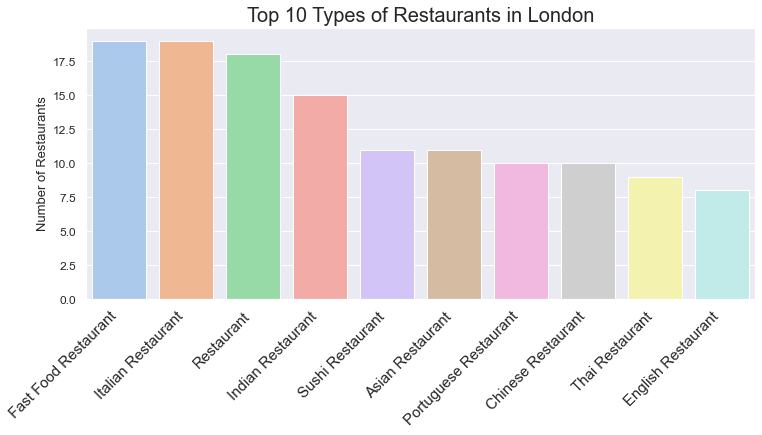

In [26]:
# Display Top 10 types of Restaurants in London
plt.figure(figsize=(12,5))    
sns.set_palette("pastel", 10)
sns.barplot(x='Venue Category', y= 'Frequency', data=df_rest_Top10)
plt.xticks(rotation=45,ha='right',fontsize=15)
plt.yticks(fontsize=12)
plt.title('Top 10 Types of Restaurants in London', fontsize=20)
plt.xlabel('')
plt.ylabel('Number of Restaurants',fontsize=13)
plt.show()    

In [27]:
df_rest.head(20)

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Barnet,51.653090,-0.200226,Spizzico,51.656600,-0.201802,Italian Restaurant
2,Barnet,51.653090,-0.200226,Dudley's Pancake House,51.652965,-0.199625,Restaurant
3,Barnet,51.653090,-0.200226,KFC,51.655905,-0.202105,Fast Food Restaurant
4,Barnet,51.653090,-0.200226,McDonald's,51.653925,-0.201348,Fast Food Restaurant
5,Barnet,51.653090,-0.200226,From China,51.651168,-0.196508,Chinese Restaurant
6,Barnet,51.653090,-0.200226,Savoro Restaurant with Rooms - London,51.656956,-0.201361,Restaurant
7,Bromley,51.402805,0.014814,wagamama,51.404082,0.018032,Asian Restaurant
8,Bromley,51.402805,0.014814,Havet,51.406184,0.013522,Turkish Restaurant
9,Bromley,51.402805,0.014814,Nando's,51.406128,0.016046,Portuguese Restaurant
10,Bromley,51.402805,0.014814,Five Guys,51.405524,0.015544,Fast Food Restaurant


**Borough: Barking and Dagenham does not show restaurants**

In [28]:
# Create df_rest_only dataframe for restaurants ONLY
df_rest_only = df_rest.groupby(['Borough'])['Venue Category'].apply (lambda x: x[x.str.contains('Restaurant')]
                                                                           .count()).to_frame()

df_rest_only

,Venue Category
Borough,
Barnet,6
Bromley,7
Camden,6
Croydon,9
Ealing,23
Enfield,2
Hackney,3
Hammersmith and Fulham,13
Haringey,10


**This shows the average number of venue categories for each borough in London. Kingston upon Thames has the highest average number of restaurants.**

In [29]:
# Get dummy values for restaurants using one hot encoding
london_onehot = pd.get_dummies(df_rest[['Venue Category']], prefix="", prefix_sep="")
# add borough column back to dataframe
london_onehot['Borough'] = df_rest['Borough'] 
# move borough column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]
london_onehot.head(10)

,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Brazilian Restaurant,Bulgarian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Dim Sum Restaurant,Eastern European Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Barnet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Barnet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Barnet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Barnet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Barnet,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Barnet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,Bromley,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Bromley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,Bromley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10,Bromley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Next, group by boroughs and get the average frequency of each Restaurant Type**

In [30]:
# Group by Boroughs and then get the average of the frequency for each restaurant type
df_grouped = london_onehot.groupby('Borough').mean().reset_index()
df_grouped.head()

,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Brazilian Restaurant,Bulgarian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Dim Sum Restaurant,Eastern European Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Barnet,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.166667,0.0,0.0,0.000000,0.0,0.333333,0.000000,0.0,0.000000,0.000000,0.0,0.166667,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1,Bromley,0.0,0.0,0.000000,0.0,0.142857,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.142857,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.142857,0.000000,0.0,0.000000,0.0,0.000000,0.285714,0.000000,0.000000,0.0,0.000000,0.142857,0.0,0.000000,0.142857,0.0,0.000000
2,Camden,0.0,0.0,0.166667,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.000000,0.0,0.166667,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
3,Croydon,0.0,0.0,0.000000,0.0,0.111111,0.0,0.0,0.0,0.0,0.111111,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.111111,0.0,0.111111,0.0,0.0,0.111111,0.0,0.111111,0.111111,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.111111,0.000000,0.000000,0.0,0.111111,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,Ealing,0.0,0.0,0.000000,0.0,0.043478,0.0,0.0,0.0,0.0,0.043478,0.000000,0.0,0.0,0.043478,0.0,0.086957,0.043478,0.0,0.043478,0.043478,0.0,0.130435,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.043478,0.0,0.043478,0.0,0.043478,0.043478,0.043478,0.043478,0.0,0.043478,0.043478,0.0,0.086957,0.000000,0.0,0.086957


**List Top 10 most common restaurant types for each borough**

In [31]:
# Display Top 10 most common restaurant types for each borough
num_top_venues = 10
for hood in df_grouped['Borough']:
    print("----"+hood+"----")
    temp = df_grouped[df_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barnet----
                       venue  freq
0                 Restaurant  0.33
1       Fast Food Restaurant  0.33
2         Italian Restaurant  0.17
3         Chinese Restaurant  0.17
4          Afghan Restaurant  0.00
5          Polish Restaurant  0.00
6           Malay Restaurant  0.00
7   Mediterranean Restaurant  0.00
8         Mexican Restaurant  0.00
9  Middle Eastern Restaurant  0.00


----Bromley----
                      venue  freq
0     Portuguese Restaurant  0.29
1        Turkish Restaurant  0.14
2          Asian Restaurant  0.14
3        Mexican Restaurant  0.14
4          Sushi Restaurant  0.14
5      Fast Food Restaurant  0.14
6         Afghan Restaurant  0.00
7       Peruvian Restaurant  0.00
8          Malay Restaurant  0.00
9  Mediterranean Restaurant  0.00


----Camden----
                       venue  freq
0         Chinese Restaurant  0.33
1                 Restaurant  0.33
2        American Restaurant  0.17
3       Fast Food Restaurant  0.17
4          Afgha

9          Seafood Restaurant  0.04


----Wandsworth----
                      venue  freq
0          Asian Restaurant  0.33
1           Thai Restaurant  0.17
2         Indian Restaurant  0.17
3                Restaurant  0.17
4     Portuguese Restaurant  0.17
5         Afghan Restaurant  0.00
6       Peruvian Restaurant  0.00
7          Malay Restaurant  0.00
8  Mediterranean Restaurant  0.00
9        Mexican Restaurant  0.00


----Westminster----
                      venue  freq
0        Italian Restaurant   0.2
1          Asian Restaurant   0.2
2         Indian Restaurant   0.2
3          Sushi Restaurant   0.2
4                Restaurant   0.2
5         Afghan Restaurant   0.0
6       Peruvian Restaurant   0.0
7          Malay Restaurant   0.0
8  Mediterranean Restaurant   0.0
9        Mexican Restaurant   0.0




## Get Most Common Restaurants

In [32]:
# Define function to sort most common restaurants in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**Display Top 10 Most Common Venues for each Borough**

In [33]:
# Get Top 10 most common restaurants for each borough
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
bor_venues_sorted = pd.DataFrame(columns=columns)
bor_venues_sorted['Borough'] = df_grouped['Borough']

for ind in np.arange(df_grouped.shape[0]):
    bor_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

bor_venues_sorted.head()

,Borough,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Barnet,Fast Food Restaurant,Restaurant,Italian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant
1,Bromley,Portuguese Restaurant,Turkish Restaurant,Sushi Restaurant,Fast Food Restaurant,Asian Restaurant,Mexican Restaurant,Vietnamese Restaurant,Chinese Restaurant,German Restaurant,French Restaurant
2,Camden,Restaurant,Chinese Restaurant,American Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant
3,Croydon,Indian Restaurant,Italian Restaurant,Asian Restaurant,Spanish Restaurant,Korean Restaurant,Portuguese Restaurant,Malay Restaurant,Caribbean Restaurant,Mediterranean Restaurant,Eastern European Restaurant
4,Ealing,Italian Restaurant,Vietnamese Restaurant,Thai Restaurant,Fast Food Restaurant,Asian Restaurant,Greek Restaurant,Indian Restaurant,English Restaurant,Caribbean Restaurant,Middle Eastern Restaurant


# Cluster Boroughs

### Run k-means to cluster the boroughs into clusters. But first, we need to figure out which is the best k value. Let's use the Elbow Method to find the best k value.

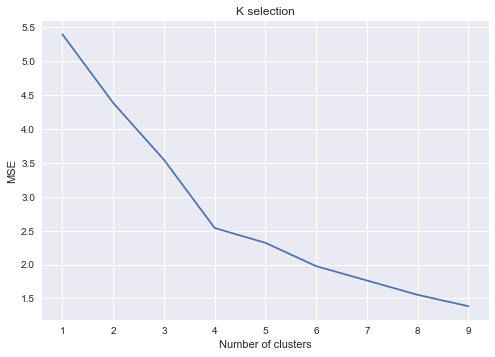

In [34]:
# Finding best k
plt.style.use("seaborn")
Ks = 10
mse = np.zeros((Ks-1))
df_grp_cluster = df_grouped.drop('Borough', 1) # Drop Borough column

for n in range(1,Ks):
    # set number of clusters
    kclusters = n
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0, init = 'random', 
                    n_init = 15).fit(df_grp_cluster)
    mse[n-1] = kmeans.inertia_

plt.plot(range(1,Ks),mse)
plt.xlabel("Number of clusters")
plt.ylabel("MSE")
plt.title("K selection")
plt.show()

### According to the Elbow Method, the best value for k is 4.

In [35]:
kclusters = 4     # set number of clusters
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grp_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:] 

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 3, 1,
       1, 1])

### Create dataframe that includes clusters and the Top 10 Restaurants for each borough.

In [36]:
# add cluster labels
bor_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
df_merged = df
df_merged = df_merged.join(bor_venues_sorted.set_index('Borough'), on='Borough')
df_merged.head() 

,Borough,Area (sq mi),Population (2019 est)[1],Latitude,Longitude,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Barking and Dagenham,13.93,212906,51.554117,0.150504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Barnet,33.49,395896,51.653090,-0.200226,0.0,Fast Food Restaurant,Restaurant,Italian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant
2,Bexley,23.38,248287,39.969238,-82.936864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brent,16.70,329771,32.937346,-87.164718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bromley,57.97,332336,51.402805,0.014814,1.0,Portuguese Restaurant,Turkish Restaurant,Sushi Restaurant,Fast Food Restaurant,Asian Restaurant,Mexican Restaurant,Vietnamese Restaurant,Chinese Restaurant,German Restaurant,French Restaurant


In [37]:
# Convert data type from NaN and float to integer
df_merged['Cluster Labels'] = df_merged['Cluster Labels'].fillna(0).astype(np.int64)
df_merged['Cluster Labels'] = df_merged['Cluster Labels'].astype(np.int64)

In [38]:
# create map
map_rest10 = folium.Map(location=[latitude, longitude],tiles='cartodbpositron',
                         attr=",a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Latitude'], 
                                  df_merged['Longitude'], 
                                  df_merged['Borough'], 
                                  df_merged['Cluster Labels']):
    
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_rest10)
       
map_rest10

In [39]:
df_rest_only = df_rest_only.reset_index()
df_rest_only.columns = ['Borough', 'Number of Restaurants']
df_rest_only.index = np.arange (1, len(df_rest_only)+1)
lon_num_rest = df_rest_only['Number of Restaurants'].to_list()
lon_bor_name = df_rest_only['Borough'].to_list()

# Examine Clusters

## Cluster 1

In [40]:
# Find and display rows that have Cluster Labels equal to 0
df_merged.loc[df_merged['Cluster Labels'] == 0, df_merged.columns[[0] + list(range(5, df_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Barking and Dagenham,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Barnet,0,Fast Food Restaurant,Restaurant,Italian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant
2,Bexley,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brent,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Camden,0,Restaurant,Chinese Restaurant,American Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant
8,Enfield,0,Chinese Restaurant,Restaurant,Vietnamese Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,English Restaurant
9,Greenwich,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Hillingdon,0,Chinese Restaurant,Fast Food Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Falafel Restaurant,English Restaurant,Eastern European Restaurant
16,Hounslow,0,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Greek Restaurant,German Restaurant,French Restaurant
21,Lewisham,0,Fast Food Restaurant,Restaurant,Turkish Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Chinese Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Falafel Restaurant


In [41]:
df_merged.drop([0], inplace=True)
df_merged.drop([2], inplace=True)
df_merged.drop([3], inplace=True)
df_merged.drop([9], inplace=True)
df_merged.drop([23], inplace=True)
df_merged.drop([27], inplace=True)
df_merged.drop([28], inplace=True)
df_merged.drop([29], inplace=True)

## Cluster 2

In [42]:
# Find and display rows that have Cluster Labels equal to 1
df_merged.loc[df_merged['Cluster Labels'] == 1, df_merged.columns[[0] + list(range(5, df_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
4,Bromley,1,Portuguese Restaurant,Turkish Restaurant,Sushi Restaurant,Fast Food Restaurant,Asian Restaurant,Mexican Restaurant,Vietnamese Restaurant,Chinese Restaurant,German Restaurant,French Restaurant
6,Croydon,1,Indian Restaurant,Italian Restaurant,Asian Restaurant,Spanish Restaurant,Korean Restaurant,Portuguese Restaurant,Malay Restaurant,Caribbean Restaurant,Mediterranean Restaurant,Eastern European Restaurant
7,Ealing,1,Italian Restaurant,Vietnamese Restaurant,Thai Restaurant,Fast Food Restaurant,Asian Restaurant,Greek Restaurant,Indian Restaurant,English Restaurant,Caribbean Restaurant,Middle Eastern Restaurant
10,Hackney,1,Vegetarian / Vegan Restaurant,English Restaurant,Modern European Restaurant,Dim Sum Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant
11,Hammersmith and Fulham,1,Portuguese Restaurant,Japanese Restaurant,Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,English Restaurant,Asian Restaurant,Indian Restaurant,Sushi Restaurant,Turkish Restaurant
12,Haringey,1,Indian Restaurant,Middle Eastern Restaurant,Turkish Restaurant,African Restaurant,Italian Restaurant,Fast Food Restaurant,Bulgarian Restaurant,Polish Restaurant,Malay Restaurant,Mediterranean Restaurant
13,Harrow,1,Afghan Restaurant,Indian Restaurant,Fast Food Restaurant,Italian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Falafel Restaurant,English Restaurant,Eastern European Restaurant
14,Havering,1,Caribbean Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Falafel Restaurant,Portuguese Restaurant,Italian Restaurant,Turkish Restaurant,Austrian Restaurant,English Restaurant
17,Islington,1,Mediterranean Restaurant,French Restaurant,Japanese Restaurant,Sushi Restaurant,Italian Restaurant,Restaurant,Mexican Restaurant,Peruvian Restaurant,Austrian Restaurant,Indian Restaurant
18,Kensington and Chelsea,1,Japanese Restaurant,English Restaurant,Seafood Restaurant,American Restaurant,French Restaurant,Italian Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Tapas Restaurant,German Restaurant


## Cluster 3

In [43]:
# Find and display rows that have Cluster Labels equal to 2
df_merged.loc[df_merged['Cluster Labels'] == 2, df_merged.columns[[0] + list(range(5, df_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
24,Redbridge,2,Eastern European Restaurant,Vietnamese Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,English Restaurant


## Cluster 4

In [44]:
# Find and display rows that have Cluster Labels equal to 3
df_merged.loc[df_merged['Cluster Labels'] == 3, df_merged.columns[[0] + list(range(5, df_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
25,Richmond upon Thames,3,German Restaurant,Vietnamese Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,English Restaurant,Eastern European Restaurant


## Display Frequency of Restaurants within each Cluster

In [45]:
cluster_freq = np.zeros((kmeans.cluster_centers_.shape))
cluster_freq[0,:] = kmeans.cluster_centers_[0,:] 
cluster_freq[1,:] = kmeans.cluster_centers_[1,:] 
cluster_freq[2,:] = kmeans.cluster_centers_[2,:]  
cluster_freq[3,:] = kmeans.cluster_centers_[3,:]
maxi = []
for i in range(3):
    maxi.extend(cluster_freq[i,:].argsort()[-4:][::-1])
  
args = np.asarray(list(set(maxi)))
df_cluster_freq = pd.DataFrame(data = cluster_freq[:,args.astype(int)], 
                               index = ['1st Cluster','2nd Cluster','3rd Cluster','4th Cluster'], 
                               columns = df_grp_cluster.columns[args.astype(int)])

df_cluster_freq = df_cluster_freq.transpose()

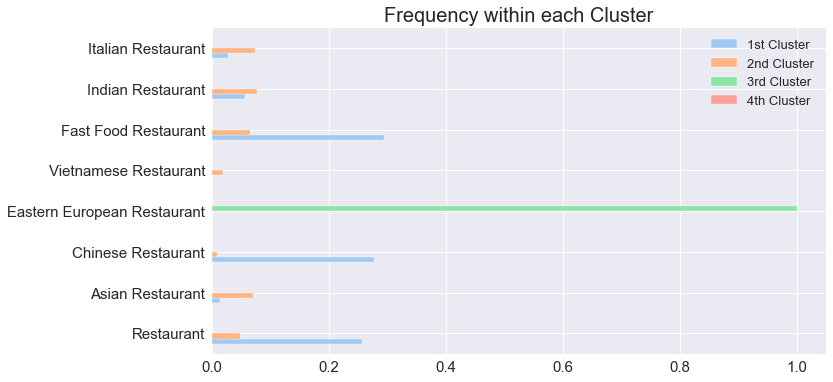

In [46]:
sns.set_palette("pastel", 10)
ax = df_cluster_freq.plot(kind='barh', figsize=(11,6))
plt.title("Frequency within each Cluster", fontsize=20)
plt.ylabel("")
plt.legend(loc='best',fontsize=13)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()  